In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 14s 3us/step


In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

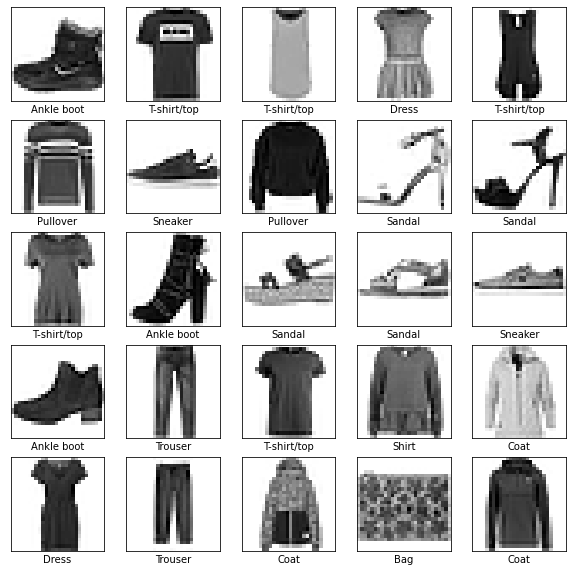

In [70]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
for i in range(5):
    print(class_names[y_train[i]])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top


In [31]:
X_train_scaled=X_train/255

In [32]:
X_test_scaled=X_test/255

In [34]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype="float32"
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype="float32"
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
28*28

784

In [40]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # used bcs y is onehotencoded
    metrics='accuracy'
)
model.fit(X_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4724 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3559 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3224 - accuracy: 0.8803
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2948 - accuracy: 0.8900
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2808 - accuracy: 0.8952


In [41]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 4ms/step - loss: 0.3472 - accuracy: 0.8767


[0.34722283482551575, 0.8766999840736389]

In [58]:
y_predict=model.predict(X_test_scaled)

313/313 [==============================] - 1s 4ms/step


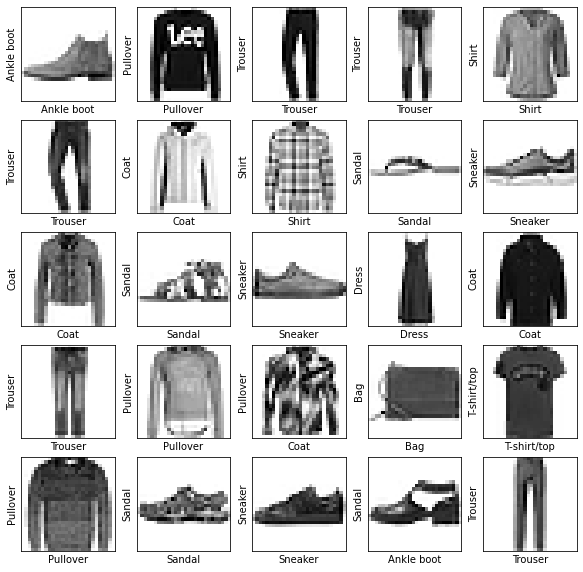

In [73]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
    plt.ylabel(class_names[np.argmax(y_predict[i])])
plt.show()

In [67]:
%%timeit -n1 -r1
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # used bcs y is onehotencoded
    metrics='accuracy'
)
model.fit(X_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4721 - accuracy: 0.8293
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3601 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3233 - accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3009 - accuracy: 0.8881
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2813 - accuracy: 0.8957
1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
